In [5]:
import numpy as np
import scipy.stats as stats
from scipy.optimize import minimize
from scipy.special import factorial
import math
from scipy.special import gammaln
import matplotlib.pyplot as plt
from scipy.stats import poisson

np.random.seed(0)
samplesize = 1000
mean1 = 8
sd1 = 10

mean2 = 16
sd2 = 12

data1 = np.random.normal(loc=mean1, scale=sd1, size=samplesize)
data2 = np.random.normal(loc=mean2, scale=sd2, size=samplesize)

#bins = int(math.floor(np.log2(samplesize)) + 1)  # number of bins

bins = 20
counts1, bin_edges1 = np.histogram(data1, bins=bins)
counts2, bin_edges2= np.histogram(data2, bins=bins)

#print(min(data1), max(data1))
#print(bin_edges1, bin_edges2)
print(counts1, counts2)

mid_point = (bin_edges1[:-1] + bin_edges1[1:]) / 2   #data1

L1 = bin_edges1[:-1]
U1 = bin_edges1[1:]
print("midpoints are:", L1, U1, mid_point)


mid_point2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2  #data2

L2 = bin_edges2[:-1]
U2 = bin_edges2[1:]
#print("midpoints are:", L2, U2, mid_point2)

[  3   6   9  11  30  40  59  87 103 114 116 123  83  77  48  38  22  16
  11   4] [  3   3   6  17  38  48  79  95 109 136 121 113  84  51  46  27  14   6
   3   1]
midpoints are: [-22.46143055 -19.55868146 -16.65593238 -13.75318329 -10.85043421
  -7.94768513  -5.04493604  -2.14218696   0.76056213   3.66331121
   6.5660603    9.46880938  12.37155846  15.27430755  18.17705663
  21.07980572  23.9825548   26.88530389  29.78805297  32.69080206] [-19.55868146 -16.65593238 -13.75318329 -10.85043421  -7.94768513
  -5.04493604  -2.14218696   0.76056213   3.66331121   6.5660603
   9.46880938  12.37155846  15.27430755  18.17705663  21.07980572
  23.9825548   26.88530389  29.78805297  32.69080206  35.59355114] [-21.01005601 -18.10730692 -15.20455784 -12.30180875  -9.39905967
  -6.49631058  -3.5935615   -0.69081241   2.21193667   5.11468575
   8.01743484  10.92018392  13.82293301  16.72568209  19.62843118
  22.53118026  25.43392934  28.33667843  31.23942751  34.1421766 ]


In [6]:
def oneparent_log_likelihood(params):
    mu, sigma = params
    log_likeli = 0.0
    likeli = 1

    for i in range(len(L1)):
        mid_point = (L1[i] + U1[i]) / 2
        lambda1 = stats.norm.pdf(mid_point, loc=mu, scale=sigma)
       
        safe_lambda1 = np.maximum(lambda1, np.finfo(float).tiny)
        lambda2 = safe_lambda1
            
        # Calculate log likelihood for each bin
 #       likeli = likeli * poisson.pmf(counts1[i], lambda1) * poisson.pmf(counts2[i], lambda2)
        
        log_likeli += (counts1[i] * np.log(safe_lambda1) - lambda1 - gammaln(counts1[i] + 1)) + \
                       counts2[i] * np.log(lambda2) - lambda2 - gammaln(counts2[i] + 1)

    
    return -(log_likeli)



In [7]:
initial_params = [6,10] 

bounds = [(None, None), (1e-6, None)]

#result = minimize(oneparent_log_likelihood, initial_params, bounds=bounds, method='L-BFGS-B')
result = minimize(oneparent_log_likelihood, initial_params, bounds=bounds, method='L-BFGS-B')

# Best fit parameters
mu_best, sigma_best = result.x
print(f"Best fit parameters: mu = {mu_best}, sigma = {sigma_best}")


Best fit parameters: mu = 6.71847730858243, sigma = 9.564250345951889


In [8]:
original1 = stats.norm.pdf(mid_point, loc=mean1, scale=sd1)
original2 = stats.norm.pdf(mid_point2, loc=mean2, scale=sd2)
print(original1, original2)
lambda1_best = stats.norm.pdf(mid_point, loc=mu_best, scale=sigma_best)
lambda2_best = lambda1_best

print("Best fit lambda1:", lambda1_best)
print("Best fit lambda2:", lambda2_best)

loglikelihood1 = result.fun
print(loglikelihood1)     #estimated loglikelihood

params = [8,10]
print(oneparent_log_likelihood(params))    #true loglikelihood

[0.00059352 0.00132085 0.00270195 0.00508052 0.00878104 0.01395052
 0.02037234 0.02734628 0.03374132 0.03826771 0.03989417 0.038229
 0.03367309 0.02726337 0.02029003 0.01388009 0.00872788 0.00504465
 0.00268016 0.00130887] [0.00058847 0.00134704 0.0028039  0.00530729 0.00913501 0.01429787
 0.0203498  0.02633753 0.03099677 0.03317295 0.03228331 0.02856922
 0.02299032 0.01682356 0.01119482 0.00677396 0.0037273  0.00186497
 0.00084855 0.00035108]
Best fit lambda1: [0.00062385 0.00143619 0.00301539 0.00577391 0.01008308 0.0160588
 0.02332538 0.03089874 0.03732922 0.04112948 0.04132889 0.03787481
 0.03165507 0.02412862 0.01677327 0.01063406 0.00614861 0.00324228
 0.00155927 0.00068389]
Best fit lambda2: [0.00062385 0.00143619 0.00301539 0.00577391 0.01008308 0.0160588
 0.02332538 0.03089874 0.03732922 0.04112948 0.04132889 0.03787481
 0.03165507 0.02412862 0.01677327 0.01063406 0.00614861 0.00324228
 0.00155927 0.00068389]
14076.613160646137
14096.89086395313


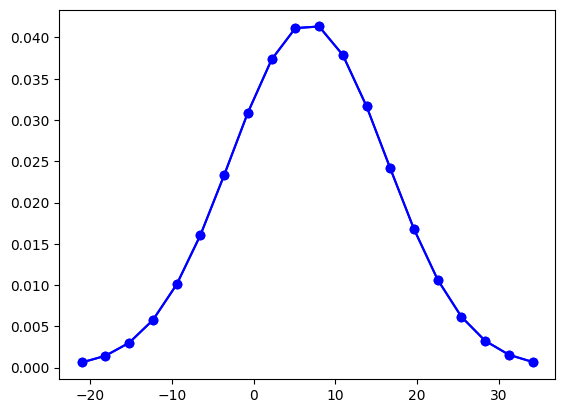

In [9]:
plt.plot(mid_point, lambda1_best, marker='o', linestyle='-', color='b')
plt.plot(mid_point, lambda2_best, marker='o', linestyle='-', color='b')

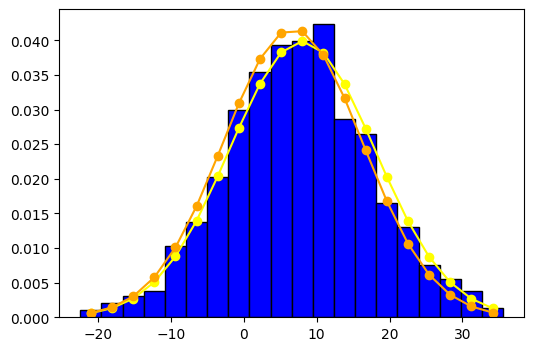

In [10]:
a = (5,10)
oneparent_log_likelihood(a)

plt.figure(figsize=(6, 4))

bin_edges = np.concatenate(([L1[0]], U1))

plt.hist(data1, bins=bin_edges, color='blue', edgecolor='black', density = True)


true1 = [0.00059352, 0.00132085, 0.00270195, 0.00508052, 0.00878104, 0.01395052,
 0.02037234, 0.02734628, 0.03374132, 0.03826771, 0.03989417, 0.038229,
 0.03367309, 0.02726337, 0.02029003, 0.01388009, 0.00872788, 0.00504465,
 0.00268016, 0.00130887]    #true lambda1


true2 = [0.00058847, 0.00134704, 0.0028039,  0.00530729, 0.00913501, 0.01429787,
 0.0203498,  0.02633753, 0.03099677, 0.03317295, 0.03228331, 0.02856922,
 0.02299032, 0.01682356, 0.01119482, 0.00677396, 0.0037273,  0.00186497,
 0.00084855, 0.00035108]    #true lambda2 

plt.plot(mid_point,true1,marker='o', color='yellow', linestyle='-')
plt.plot(mid_point,lambda1_best,marker='o', color='orange', linestyle='-')

plt.show()

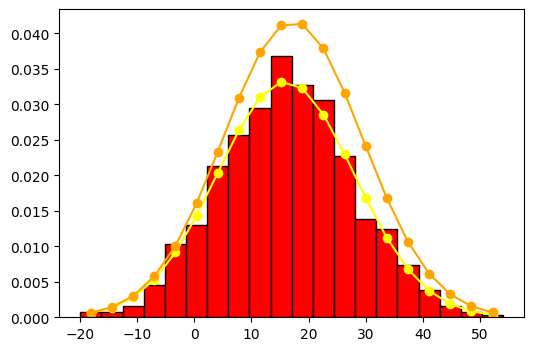

In [11]:
plt.figure(figsize=(6, 4))
bin_edges2 = np.concatenate(([L2[0]], U2))
plt.hist(data2, bins=bin_edges2, color='red', edgecolor='black', density = True)
plt.plot(mid_point2,true2,marker='o', color='yellow', linestyle='-')
plt.plot(mid_point2,lambda2_best,marker='o', color='orange', linestyle='-')


# two parents

In [12]:
def twoparents_log_likelihood(params):
    mu1, sigma1, mu2, sigma2 = params 
    log_likeli2 = 0.0
 #   truelambda = []

    for i in range(len(L1)):
        mid_point1 = (L1[i] + U1[i]) / 2
        mid_point2 = (L2[i] + U2[i]) / 2
        lambda1 = stats.norm.pdf(mid_point1, loc=mu1, scale=sigma1)
        safe_lambda1 = np.maximum(lambda1, np.finfo(float).tiny)
        
        lambda2 = stats.norm.pdf(mid_point2, loc=mu2, scale=sigma2)
        safe_lambda2 = np.maximum(lambda2, np.finfo(float).tiny)
        
        
        log_likeli2 += counts1[i] * np.log(safe_lambda1) - lambda1 - gammaln(counts1[i] + 1) + \
                       counts2[i] * np.log(safe_lambda2) - lambda2 - gammaln(counts2[i] + 1)

    return -log_likeli2


In [13]:
initial_params = [8,10,16,12] 

bounds = [(None, None), (1e-6, None), (None, None), (1e-6, None)]

result2 = minimize(twoparents_log_likelihood, initial_params, bounds=bounds, method='L-BFGS-B')


# Best fit parameters
mu1_best, sigma1_best, mu2_best, sigma2_best = result2.x
print("mu1 = ",  {mu1_best}, "sigma1 =" , {sigma1_best}, "mu2 =" , {mu2_best}, "sigma2 =" , {sigma2_best})

mu1 =  {7.552934041572786} sigma1 = {9.91997767463361} mu2 = {16.188890973187274} sigma2 = {11.621365566167267}


In [14]:
lambda1_best2 = stats.norm.pdf(mid_point, loc=mu1_best, scale=sigma1_best)
lambda2_best2 = stats.norm.pdf(mid_point2, loc=mu2_best, scale=sigma2_best)

print("Best fit lambda1:", lambda1_best2)
print("Best fit lambda2:", lambda2_best2)

loglikelihood2 = result2.fun
print(loglikelihood2)    #estimated loglikelihood

params = [8,10,16,12]
print(twoparents_log_likelihood(params))   #true loglikelihood

Best fit lambda1: [0.00063697 0.00141722 0.00289447 0.00542644 0.00933845 0.01475192
 0.02139124 0.02847325 0.0347898  0.03901941 0.04017198 0.03796467
 0.0329344  0.02622609 0.0191704  0.01286301 0.00792261 0.00447927
 0.00232466 0.00110746]
Best fit lambda2: [0.00044347 0.00107791 0.00236755 0.00469901 0.00842766 0.01365844
 0.02000268 0.02647087 0.03165493 0.03420641 0.03340155 0.02947263
 0.0234998  0.01693177 0.01102386 0.00648572 0.00344806 0.00165648
 0.0007191  0.00028209]
14307.856548816077
14310.049932918952


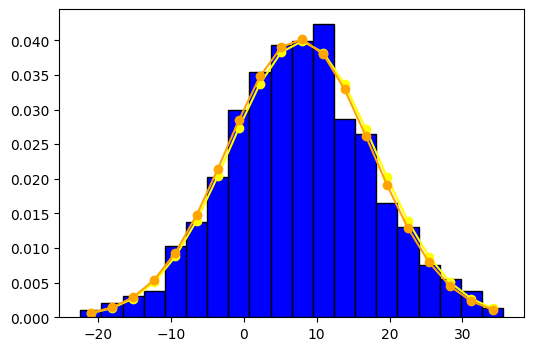

In [15]:
a = (5,10,10,15)
twoparents_log_likelihood(a)

plt.figure(figsize=(6, 4))

bin_edges = np.concatenate(([L1[0]], U1))

plt.hist(data1, bins=bin_edges, color='blue', edgecolor='black', density = True)


plt.plot(mid_point,true1,marker='o', color='yellow', linestyle='-')
plt.plot(mid_point,lambda1_best2,marker='o', color='orange', linestyle='-')

plt.show()

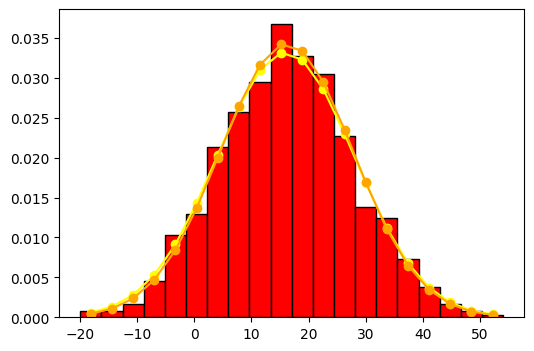

In [16]:
plt.figure(figsize=(6, 4))
bin_edges2 = np.concatenate(([L2[0]], U2))
plt.hist(data2, bins=bin_edges2, color='red', edgecolor='black', density = True)
plt.plot(mid_point2,true2,marker='o', color='yellow', linestyle='-')
plt.plot(mid_point2,lambda2_best2,marker='o', color='orange', linestyle='-')


In [17]:
logBF = loglikelihood1 - loglikelihood2
print(logBF)

-231.24338816993986
